MODEL TRAINING(DECISION TREE INDUCTION)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r'Dataset\training_data.csv', encoding='latin1')
# One Hot Encoded Features
X=df.drop(columns='prognosis')
# Labels
y = df['prognosis']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=101)
print(len(X_train)), print(len(y_train))
print(len(X_test)), print(len(y_test))
# Check class distribution in the training set
train_counter = Counter(y_train)
test_counter = Counter(y_test)
# Ensure all classes are present in the training set
missing_classes = [print(cls) for cls in test_counter if cls not in train_counter]
#any class is not missing in the training set


3936
3936
984
984


Model Training With python package

In [18]:

#The default entropy used which is Shannon entropy (measures the impurity or disorder in a set of data)
#changing the model hyper-parameters (max_depth) and keep repeating the training and validation process until achieve a good validation accuracy value
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,14,16]
training_accuracy_values = []
validation_accuracy_values = []
for max_depth_val in max_depth_values:
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth_val,random_state=0)
    clf_dt=dt.fit(X_train, y_train)
    # calculate the training and validation accuracy
    y_pred_train = clf_dt.predict(X_train)
    y_pred_val = clf_dt.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_test, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)
#disease_pred = clf_dt.predict(X_test)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

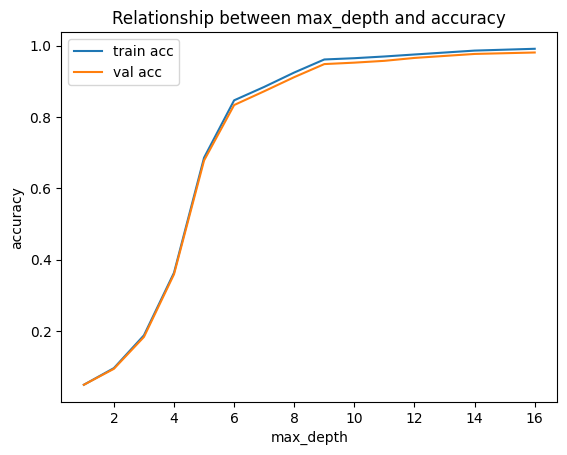

In [19]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

Onwards 5 as the max_depth increases, the validation accuracy becomes low compared to training accuracy. This is known as "overfitting".

In [20]:
#for Generalized model we have to take max_dept=5
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dt=dt.fit(X_train, y_train)
disease_pred = clf_dt.predict(X_test)

Evaluation Metrics

In [21]:
#training score
print("Accuracy on training set: {:.3f}".format(clf_dt.score(X_train, y_train)))
disease_real = y_test.values
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))
print("Accuracy on test set: {:.3f}".format(clf_dt.score(X_test, y_test)))
print("The accuracy is "+str(metrics.accuracy_score(y_test,disease_pred)*100)+"%")

Accuracy on training set: 0.686
Pred: Jaundice
Actual: Bronchial Asthma

Pred: Gastroenteritis
Actual: Malaria

Pred: AIDS
Actual: Allergy

Pred: Gastroenteritis
Actual: Paralysis (brain hemorrhage)

Pred: Jaundice
Actual: Bronchial Asthma

Pred: Heart attack
Actual: GERD

Pred: Psoriasis
Actual: Acne

Pred: AIDS
Actual: Dimorphic hemmorhoids(piles)

Pred: AIDS
Actual: Peptic ulcer diseae

Pred: Jaundice
Actual: Bronchial Asthma

Pred: Gastroenteritis
Actual: Paralysis (brain hemorrhage)

Pred: Fungal infection
Actual: Drug Reaction

Pred: Heart attack
Actual: GERD

Pred: Heart attack
Actual: GERD

Pred: Psoriasis
Actual: Acne

Pred: Hepatitis D
Actual: Dengue

Pred: Heart attack
Actual: GERD

Pred: (vertigo) Paroymsal  Positional Vertigo
Actual: Hypoglycemia

Pred: AIDS
Actual: Urinary tract infection

Pred: Psoriasis
Actual: Fungal infection

Pred: Varicose veins
Actual: Bronchial Asthma

Pred: Hyperthyroidism
Actual: Hypothyroidism

Pred: AIDS
Actual: Cervical spondylosis

Pred: Jau

[[22  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 24  0 ...  0  0  0]
 [ 0  1  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 22]]


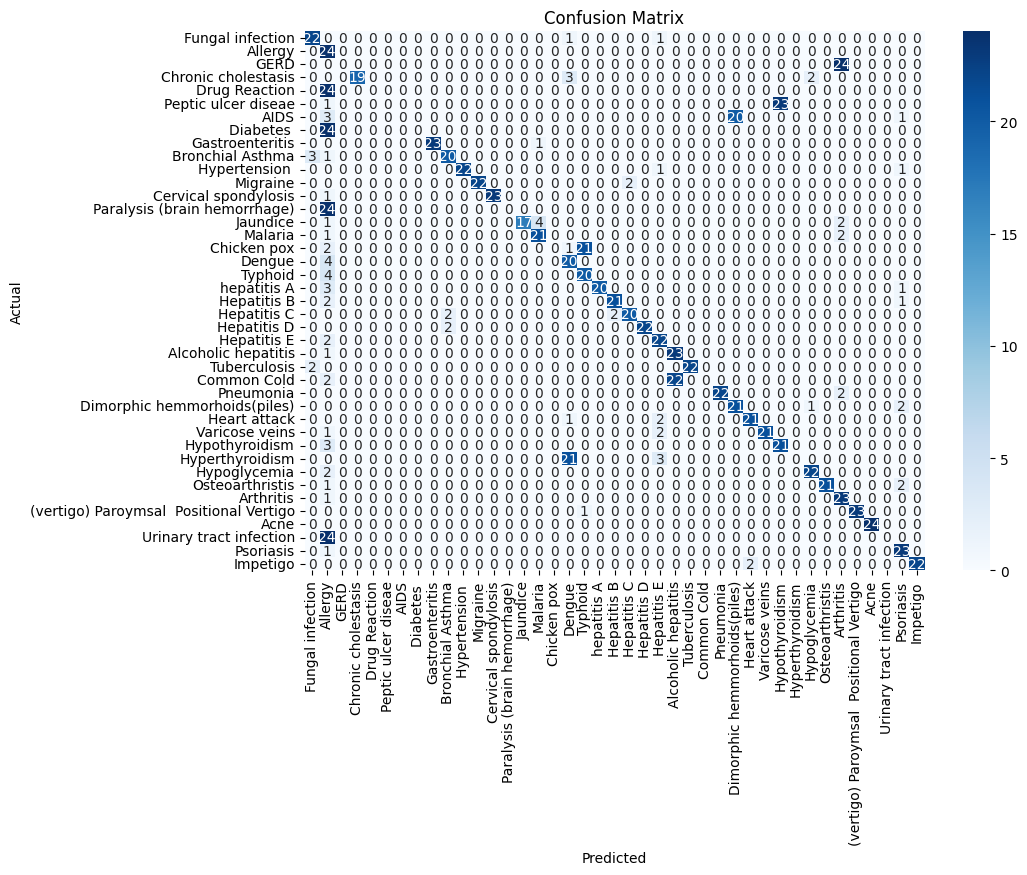

                                         precision    recall  f1-score   support

                       Fungal infection       0.81      0.92      0.86        24
                                Allergy       0.15      1.00      0.27        24
                                   GERD       0.00      0.00      0.00        24
                    Chronic cholestasis       1.00      0.79      0.88        24
                          Drug Reaction       0.00      0.00      0.00        24
                    Peptic ulcer diseae       0.00      0.00      0.00        24
                                   AIDS       0.00      0.00      0.00        24
                              Diabetes        0.00      0.00      0.00        24
                        Gastroenteritis       1.00      0.96      0.98        24
                       Bronchial Asthma       0.83      0.83      0.83        24
                          Hypertension        1.00      0.92      0.96        24
                           

c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wajiz.pk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [22]:
conf_matrix=confusion_matrix(y_test,disease_pred)
print(confusion_matrix(y_test,disease_pred))
plt.figure(figsize=(10, 7))
unique_diseases = df['prognosis'].drop_duplicates()
target_names = unique_diseases
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,disease_pred,target_names=target_names))

In [23]:
#ROC_AUC metric
label_encoder = LabelEncoder()
# Fit and transform the string labels to numerical labels
y_true = label_encoder.fit_transform(y_test)
y_pred = label_encoder.transform(disease_pred)
print("Encoded y_true:", y_true)
print("Encoded y_pred:", y_pred)
print("Classes:", label_encoder.classes_)
# Get the classes from the label encoder
classes = list(label_encoder.classes_)
# Binarize the numerical labels
y_true_binarized = label_binarize(y_true, classes=range(len(classes)))
y_pred_binarized = label_binarize(y_pred, classes=range(len(classes)))
print("Binarized y_true:\n", y_true_binarized)
print("Binarized y_pred:\n", y_pred_binarized)
from sklearn.metrics import roc_auc_score
# Compute ROC-AUC for macro and micro averages
roc_auc_macro = roc_auc_score(y_true_binarized, y_pred_binarized, average='macro')
roc_auc_micro = roc_auc_score(y_true_binarized, y_pred_binarized, average='micro')
print(f'Macro ROC-AUC: {roc_auc_macro}')
print(f'Micro ROC-AUC: {roc_auc_micro}')

Encoded y_true: [ 6 15 29 14  8 17 31  4 11 14 32 24  8 25  1 24 25  6 25 16  2 24 28 33
 22 40 25 23 40 33 13 33 14 21 27  8  6 32 25 28 39 14 16 12 16 34  9  2
 37 30 11 11 36 11 27  3 23  8  1 16 29 17 25 25 38 10 15  6  8 28 26 35
  3 24 17 31  1 17 36  7  6 27 30 22 32 30 23 35 15 37 26 22 14 13 19 32
 23  9 33 11 36  1 27 19  0 37 10  3 17  0 18 33  1 39 20 16  8 29  1 23
 21  5  7  4 11 15 15 31  0 27  9 30 19 34 12 26 29 17 24 25 18  4 30  5
 26 19 39 15 22 23  2 21 28 14 21  0 17  0 22  7 18 13 23 18  0 16 21 23
 11 40 34 22 10 23 38 10 28 26 11 33 10 29  7 35 39  7 18 38 12 38  5 30
 39 40 20  9 20 34 21 29  4 33  2 39  7 36 10 19 26 14 33 32  4 18 35  5
 30 12  9 26 26 29  0 20  9  3 37 39 24 32 35  3 20 33 27  0  5  0 25 24
  0  6 14  7  3 16 19 12  6  4  5 40 19  5 27 25 30 39  5 12 10 34  0 31
 10 12  2  1  4 40 31  9 26 20 38 38 31 28 22  5 39 37  0 36 20 14 24 28
 32 18  3  5 36  9 18 39 24 40 17 29 13 28 31  6 37 29 20 35 29 40 12 22
 36  4  1 19 28 23 20 13 34  9 15 4

Without python package

In [34]:
import math
from collections import Counter
def calculate_entropy(df):
    total_instances = len(df)
    if total_instances == 0:
        return 0

    label_counts = Counter(df['prognosis'])
    entropy = 0.0

    for count in label_counts.values():
        probability = count / total_instances
        entropy -= probability * math.log2(probability)
    
    return entropy

def split_dataset(df, feature):
    left_split = df[df[feature] == 0]
    right_split = df[df[feature] == 1]
    return left_split, right_split

def calculate_information_gain(df, feature):
    total_instances = len(df)
    initial_entropy = calculate_entropy(df)

    left_split, right_split = split_dataset(df, feature)
    if len(left_split) == 0 or len(right_split) == 0:
        return 0

    left_entropy = calculate_entropy(left_split)
    right_entropy = calculate_entropy(right_split)

    weighted_entropy = (len(left_split) / total_instances) * left_entropy + \
                       (len(right_split) / total_instances) * right_entropy

    information_gain = initial_entropy - weighted_entropy
    return information_gain
    

def choose_best_feature_to_split(df):
    features = df.columns[:-1]  # Exclude the label column
    best_feature = None
    best_info_gain = 0.0

    for feature in features:
        info_gain = calculate_information_gain(df, feature)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature
    
    return best_feature

class TreeNode:
    def __init__(self, feature=None, left=None, right=None, prediction=None):
        self.feature = feature
        self.left = left
        self.right = right
        self.prediction = prediction

def build_tree(df, depth=0, max_depth=5):
    labels = df['prognosis'].tolist()
    if len(set(labels)) == 1:
        return TreeNode(prediction=labels[0])
    if depth >= max_depth:
        most_common_label = Counter(labels).most_common(1)[0][0]
        return TreeNode(prediction=most_common_label)

    best_feature = choose_best_feature_to_split(df)
    if best_feature is None:
        most_common_label = Counter(labels).most_common(1)[0][0]
        return TreeNode(prediction=most_common_label)

    left_split, right_split = split_dataset(df, best_feature)
    left_subtree = build_tree(left_split, depth + 1, max_depth)
    right_subtree = build_tree(right_split, depth + 1, max_depth)

    return TreeNode(feature=best_feature, left=left_subtree, right=right_subtree)

def predict(tree, instance):
    if tree.prediction is not None:
        return tree.prediction

    # Ensure the feature is accessed correctly
    feature_value = instance[tree.feature]
    if isinstance(feature_value, pd.Series):
        # Handle the case where feature_value is a Series
        if (feature_value == 0).all():
            return predict(tree.left, instance)
        else:
            return predict(tree.right, instance)
    else:
        # Handle the case where feature_value is a scalar
        if feature_value == 0:
            return predict(tree.left, instance)
        else:
            return predict(tree.right, instance)
def predict_dataframe(tree, df):
    predictions = df.apply(lambda row: predict(tree, row), axis=1)
    return predictions



   
   

# Build the decision tree
df_concat=pd.concat([X_train,y_train],axis=1)
tree = build_tree(df_concat, max_depth=5)


prediction =  predict_dataframe(tree, X_test)
#prediction = predict(tree, X_test)
print("Predicted Prognosis:", prediction)
accuracy = (prediction == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted Prognosis: 3125                        Jaundice
9                   Fungal infection
568                  Gastroenteritis
4268                   Drug Reaction
166                      Chicken pox
                    ...             
3334                 Gastroenteritis
3769    Dimorphic hemmorhoids(piles)
3030                       Psoriasis
383     Dimorphic hemmorhoids(piles)
1842                     Hepatitis B
Length: 984, dtype: object
Accuracy: 67.78%
